In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [2]:
data = """ville,année,volume facturé (m3),vente gros,source
FDF,2006,6400240,,RPQS Odyssi 2006 - page 16
FDF,2007,6117691,,RPQS Odyssi 2007 - page 22
FDF,2008,6143842,,RPQS Odyssi 2008 - page 13
FDF,2009,6565931,,RPQS Odyssi 2009 - page 12 # (Vente d'eau en gros à la SMDS incluse: volume inconnu page 32)
FDF,2010,6694961,1003470,RPQS Odyssi 2010 - page 11 # (Vente d'eau en gros à la SMDS incluse: 1003470 page 22 conso hors gros en baisse)
FDF,2011,7039122,914868,RPQS Odyssi 2011 - page 37 # (Vente d'eau en gros à la SMDS incluse : 914868 page 30)
FDF,2012,6444768,995403,RPQS Odyssi 2012 - page 8 # (Vente d'eau en gros à la SMDS incluse : 995403 page 32)
FDF,2013,6562034,1226402,RPQS Odyssi 2013 - page 14 # (Vente d'eau en gros à la SMDS incluse: 1226402 page 14)
FDF,2014,7003335,1734240,RPQS Odyssi 2014 - page 14 # (Vente d'eau en gros à la SMDS incluse: 1734240 page 14)
FDF,2015,5083126,,RPQS Odyssi 2015 - page 15 # hors vente en gros
FDF,2016,5167676,,RPQS Odyssi 2016 - page 14 
FDF,2017,5114105,,RPQS Odyssi 2017 - page 15
FDF,2018,4992471,,RPQS Odyssi 2018 - page 10
FDF,2019,4867814,,RPQS Odyssi 2019 - page 9
FDF,2020,4198904,,RPQS Odyssi 2020 - pages 14
FDF,2021,5090671,,RPQS Odyssi 2021 - page 21
Lamentin,2015,2041564,,RPQS Odyssi 2015 - page 15
Saint-Joseph,2015,530445,,RPQS Odyssi 2015 - page 15
Lamentin,2016,2959366,,RPQS Odyssi 2016 - page 14 
Saint-Joseph,2016,727340,,RPQS Odyssi 2016 - page 14
Schoelcher, 2016,695764,,RPQS Odyssi 2016 - page 14
Lamentin,2017,3030563,,RPQS Odyssi 2017 - page 15
Saint-Joseph,2017,726468,,RPQS Odyssi 2017 - page 15
Schoelcher,2017,961720,,RPQS Odyssi 2017 - page 15
Lamentin,2018,2478537,,RPQS Odyssi 2018 - page 10
Saint-Joseph,2018,717415,,RPQS Odyssi 2018 - page 10
Schoelcher,2018,1192087,,RPQS Odyssi 2018 - page 10
Lamentin,2019,2672343,,RPQS Odyssi 2019 - page 9
Saint-Joseph,2019,754186,,RPQS Odyssi 2019 - page 9
Schoelcher,2019,1207907,,RPQS Odyssi 2019 - page 9
Lamentin,2020,2416509,,RPQS Odyssi 2020 - pages 14
Saint-Joseph,2020,771312,,RPQS Odyssi 2020 - pages 15
Schoelcher,2020,1232213,,RPQS Odyssi 2020 - pages 15
Lamentin,2021,2734174,,RPQS Odyssi 2021 - page 21
Saint-Joseph,2021,796763,,RPQS Odyssi 2021 - page 21
Schoelcher,2021,1167439,,RPQS Odyssi 2021 - page 21
Schoelcher,2015,1210651,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%20SCHOELCHER%202015.pdf - page 19
Schoelcher,2014,1218618,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%20SMDS%20CACEM%20SCHOELCHER%202014.pdf - page 16
Schoelcher,2013,1290395,,https://www.observatoire-eau-martinique.fr/documents/RAD_AEP_SCHOELCHER_2013.pdf - page 17
Schoelcher,2012,1290395,,https://www.observatoire-eau-martinique.fr/documents/RADE%20SMDS%20%20Schoelcher%202012.pdf - page 18 # (identique à 2013 ...)
Schoelcher,2011,1266378,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%20SAUR%20Schoelcher%202011.pdf - page 19
Schoelcher,2009,1403854,,https://www.observatoire-eau-martinique.fr/documents/RAD_AEP_2009_SCHOELCHER_web.pdf - page 16
Schoelcher,2008,1401564,,https://www.observatoire-eau-martinique.fr/documents/RAD_AEP_2008_SCHOELCHER_web.pdf - page 83
Schoelcher,2007,1413793,,https://www.observatoire-eau-martinique.fr/documents/RAD_AEP_2007_SCHOELCHER_web.pdf - page 14
Schoelcher,2006,1446977,,https://www.observatoire-eau-martinique.fr/documents/RAD_AEP_2006_SCHOELCHER_web.pdf - page 15
Lamentin,2010,3125547,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%202010%20-%20LAMENTIN%20-SAINT-JOSEPH.pdf - page 29
Saint-Joseph,2010,751056,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%202010%20-%20LAMENTIN%20-SAINT-JOSEPH.pdf - page 29
Lamentin,2011,3096084,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%202011%20-%20LAMENTIN%20-%20SAINT-JOSEPH.pdf - page 25
Saint-Joseph,2011,728938,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%202010%20-%20LAMENTIN%20-SAINT-JOSEPH.pdf - page 25
Lamentin,2012,3034224,,https://www.observatoire-eau-martinique.fr/documents/RAD%20ST-JO%20LAMENTIN%20AEP%20SME%202012.pdf - page 28
Saint-Joseph,2012,746675,,https://www.observatoire-eau-martinique.fr/documents/RAD%20ST-JO%20LAMENTIN%20AEP%20SME%202012.pdf - page 28
Lamentin,2013,2889005,,https://www.observatoire-eau-martinique.fr/documents/RAD%20EAU%20SME%20CACEM%202013.pdf - page 32
Saint-Joseph,2013,716610,,https://www.observatoire-eau-martinique.fr/documents/RAD%20EAU%20SME%20CACEM%202013.pdf - page 32
Lamentin,2014,2960416,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%20SME%20CACEM%20LAMENTIN%20%20ST-JOSEPH%202014.pdf - page 32
Saint-Joseph,2014,764387,,https://www.observatoire-eau-martinique.fr/documents/RAD%20AEP%20SME%20CACEM%20LAMENTIN%20%20ST-JOSEPH%202014.pdf - page 32
"""

In [3]:
f = io.StringIO(data)
df = pd.read_csv(f).fillna(0)
df['volume'] = df['volume facturé (m3)'] - df['vente gros']
df

,ville,année,volume facturé (m3),vente gros,source,volume
0,FDF,2006,6400240,0.0,RPQS Odyssi 2006 - page 16,6400240.0
1,FDF,2007,6117691,0.0,RPQS Odyssi 2007 - page 22,6117691.0
2,FDF,2008,6143842,0.0,RPQS Odyssi 2008 - page 13,6143842.0
3,FDF,2009,6565931,0.0,RPQS Odyssi 2009 - page 12 # (Vente d'eau en g...,6565931.0
4,FDF,2010,6694961,1003470.0,RPQS Odyssi 2010 - page 11 # (Vente d'eau en g...,5691491.0
5,FDF,2011,7039122,914868.0,RPQS Odyssi 2011 - page 37 # (Vente d'eau en g...,6124254.0
6,FDF,2012,6444768,995403.0,RPQS Odyssi 2012 - page 8 # (Vente d'eau en gr...,5449365.0
7,FDF,2013,6562034,1226402.0,RPQS Odyssi 2013 - page 14 # (Vente d'eau en g...,5335632.0
8,FDF,2014,7003335,1734240.0,RPQS Odyssi 2014 - page 14 # (Vente d'eau en g...,5269095.0
9,FDF,2015,5083126,0.0,RPQS Odyssi 2015 - page 15 # hors vente en gros,5083126.0


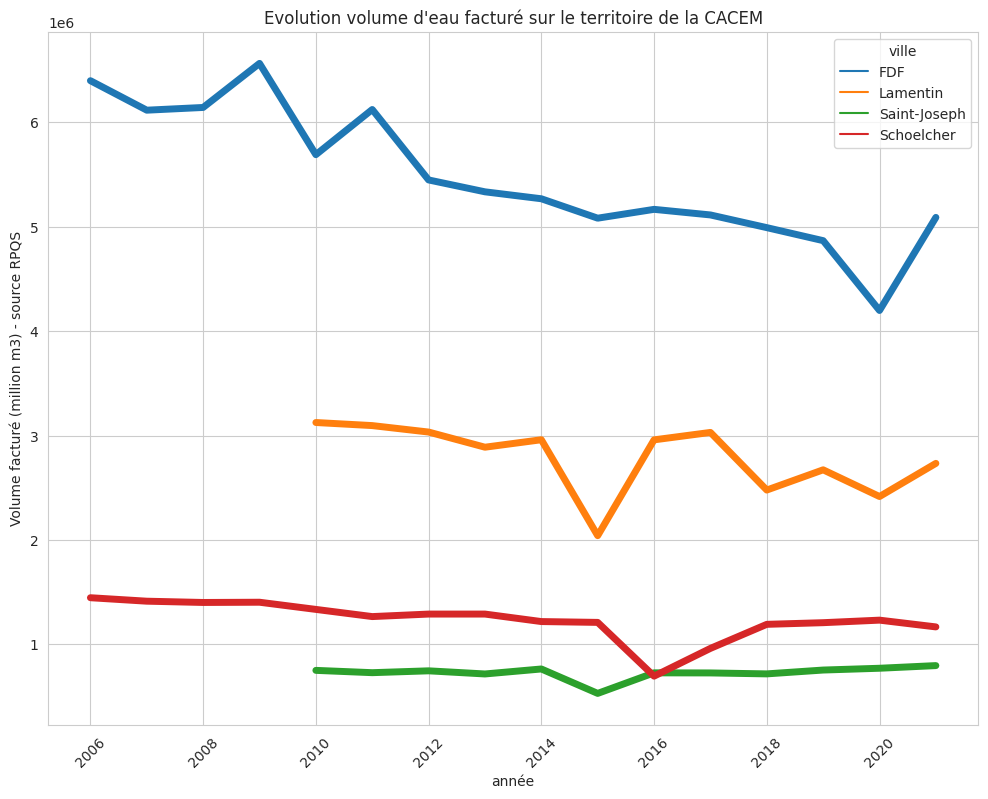

In [4]:
f, ax = plt.subplots(figsize=(12, 9))
g = sns.lineplot(data=df, x='année', y='volume', hue="ville", linewidth=5)
_ = ax.tick_params(axis='x', labelrotation = 45)
_ = ax.set(ylabel='Volume facturé (million m3) - source RPQS')
_ = g.set_title("Evolution volume d'eau facturé sur le territoire de la CACEM")
plt.savefig('volume-facture-cacem.png')

In [5]:
df_cacem_fdf_schoelcher = df.loc[df.ville.isin(['FDF', 'Schoelcher'])].groupby('année').agg('sum').reset_index()
df_cacem_fdf_schoelcher['ville'] = 'FDF + Schoelcher' # no data for 2010 @ schoelcher
df_cacem_fdf_schoelcher

,année,ville,volume facturé (m3),vente gros,source,volume
0,2006,FDF + Schoelcher,7847217,0.0,RPQS Odyssi 2006 - page 16https://www.observat...,7847217.0
1,2007,FDF + Schoelcher,7531484,0.0,RPQS Odyssi 2007 - page 22https://www.observat...,7531484.0
2,2008,FDF + Schoelcher,7545406,0.0,RPQS Odyssi 2008 - page 13https://www.observat...,7545406.0
3,2009,FDF + Schoelcher,7969785,0.0,RPQS Odyssi 2009 - page 12 # (Vente d'eau en g...,7969785.0
4,2010,FDF + Schoelcher,6694961,1003470.0,RPQS Odyssi 2010 - page 11 # (Vente d'eau en g...,5691491.0
5,2011,FDF + Schoelcher,8305500,914868.0,RPQS Odyssi 2011 - page 37 # (Vente d'eau en g...,7390632.0
6,2012,FDF + Schoelcher,7735163,995403.0,RPQS Odyssi 2012 - page 8 # (Vente d'eau en gr...,6739760.0
7,2013,FDF + Schoelcher,7852429,1226402.0,RPQS Odyssi 2013 - page 14 # (Vente d'eau en g...,6626027.0
8,2014,FDF + Schoelcher,8221953,1734240.0,RPQS Odyssi 2014 - page 14 # (Vente d'eau en g...,6487713.0
9,2015,FDF + Schoelcher,6293777,0.0,RPQS Odyssi 2015 - page 15 # hors vente en gro...,6293777.0


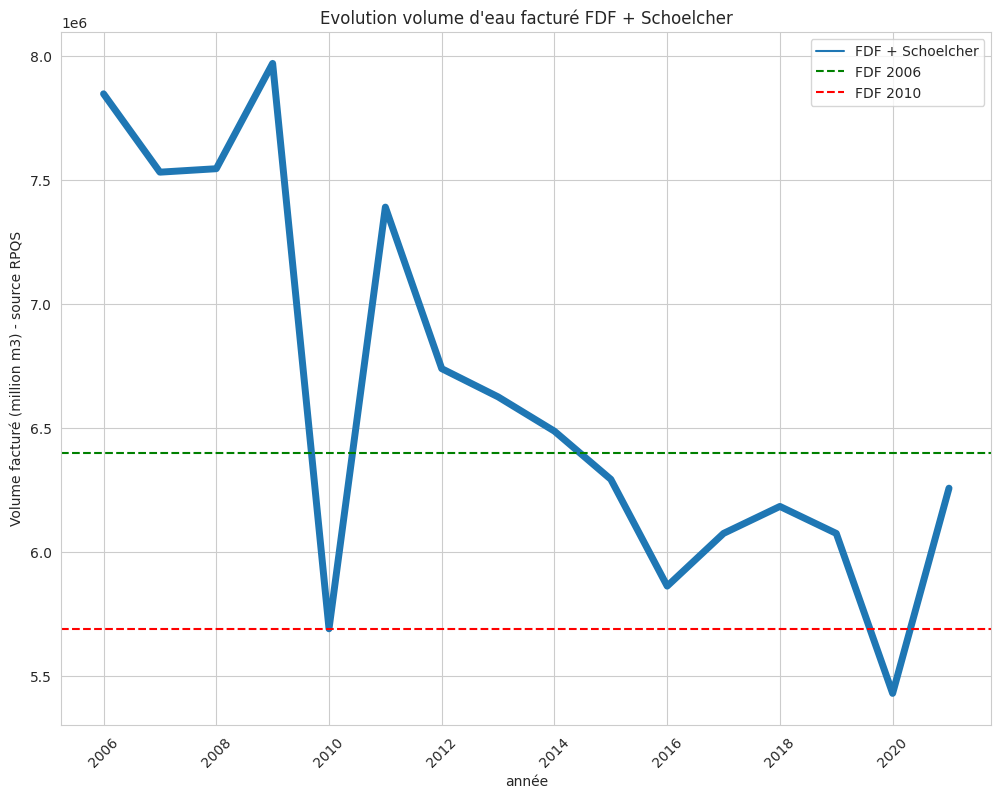

<Figure size 640x480 with 0 Axes>

In [6]:
f, ax = plt.subplots(figsize=(12, 9))
g = sns.lineplot(data=df_cacem_fdf_schoelcher, x='année', y='volume', hue="ville", linewidth=5)

ax.set(ylabel='Volume facturé (million m3) - source RPQS')
ax.axhline(df.loc[(df.ville=='FDF') & (df.année == 2006)].volume.values[0] , ls='--', color="g", label="FDF 2006")
ax.axhline(df.loc[(df.ville=='FDF') & (df.année == 2010)].volume.values[0] , ls='--', color="r", label="FDF 2010")
g.set_title("Evolution volume d'eau facturé FDF + Schoelcher")
_ = ax.tick_params(axis='x', labelrotation = 45)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.show()
plt.savefig('volume-facture-fdf+shoelcher.png')